## Выявляем читеров в PUBG ##
### Data Scientist Beginer ###

1. Подключаем необходимые библиотеки
- pandas - главная библиотека python для работы с данными.
- matplotlib - библиотека для визуализации данных двумерной и трёхмернй графикой.
- seaborn - библиотека для создания статистических графиков на Python. Она основывается на matplotlib и тесно взаимодействует со структурами данных pandas.

In [1]:
import pandas as pd # Стандартное сокращение для Pandas
import matplotlib.pyplot as plt # Стандартное сокращение для matplotlib
import seaborn as sns # Стандартное сокращение для seaborn
from IPython.display import Image # Библиотека для отображения картинок

2. Загрузка и преобразование данных
- Загружаем данные из нашего файла.
- Преобразуем в Pandas DataFrame — это двумерный массив, похожий на таблицу/лист Excel. Наши данные как раз хорошо для этого подходят.

In [2]:
json_file_path = 'pubg_players.json'
df = pd.read_json(json_file_path)

print('Размер: строк и столбцов:')
df.shape


Размер: строк и столбцов:


(9999, 14)

### Предварительный анализ данных ###

Отобразим первые 5 строчек

In [3]:
df.head(5)

,Id,matchDuration,heals,revives,swimDistance,walkDistance,rideDistance,teamKills,headshotKills,killStreaks,kills,longestKill,roadKills,weaponsAcquired
0,9329eb41e215eb,1884,0,0,0.0,588.00,0.0,0,0,0,0,0.00,0,1
1,eba2e23cc169cf,1315,2,0,0.0,3312.00,307.3,0,0,1,1,45.80,0,4
2,3b8e50997fc487,1421,0,0,0.0,45.31,0.0,0,0,0,0,0.00,0,0
3,17d65142814577,1817,0,0,126.7,3324.00,0.0,0,0,1,2,26.41,0,2
4,a57dbdaa4b1d17,1420,7,0,17.2,1758.00,883.2,0,1,1,1,97.09,0,9


Видим что одна строка - это данные по одному игроку в какой-то игре.

Выведем имеющиеся параметры в датасете (названия колонок) отдельно 

In [4]:
df.columns

Index(['Id', 'matchDuration', 'heals', 'revives', 'swimDistance',
       'walkDistance', 'rideDistance', 'teamKills', 'headshotKills',
       'killStreaks', 'kills', 'longestKill', 'roadKills', 'weaponsAcquired'],
      dtype='object')

Посмотрим общую информацию по нашему датафрейму по колонкам:
- есть ли пропуски данных
- какие типы данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               9999 non-null   object 
 1   matchDuration    9999 non-null   int64  
 2   heals            9999 non-null   int64  
 3   revives          9999 non-null   int64  
 4   swimDistance     9999 non-null   float64
 5   walkDistance     9999 non-null   float64
 6   rideDistance     9999 non-null   float64
 7   teamKills        9999 non-null   int64  
 8   headshotKills    9999 non-null   int64  
 9   killStreaks      9999 non-null   int64  
 10  kills            9999 non-null   int64  
 11  longestKill      9999 non-null   float64
 12  roadKills        9999 non-null   int64  
 13  weaponsAcquired  9999 non-null   int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.1+ MB


Отлично - вся таблица заполнена! Это бывает далеко не всегда.
Так же видим, что категориальных признаков - 1 шт, это ID нашего игрока
Все остальные признаки - числовые.

Посмотрим описательные статистики по нашим признакам
- количество
- среднее
- стандартное отклонение
- минимум
- процентили
- максимум

In [6]:
df.describe()

,matchDuration,heals,revives,swimDistance,walkDistance,rideDistance,teamKills,headshotKills,killStreaks,kills,longestKill,roadKills,weaponsAcquired
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1577.748775,1.309431,0.161016,4.989842,1157.679403,571.327704,0.025703,0.247525,0.566957,0.938094,23.314017,0.014001,3.622062
std,254.744279,2.547972,0.461431,36.533606,1231.313477,1429.390499,0.173336,0.768606,0.791971,1.564403,54.059027,0.216826,2.335587
min,1042.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1365.000000,0.000000,0.000000,0.000000,160.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1435.000000,0.000000,0.000000,0.000000,679.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1849.000000,1.000000,0.000000,0.000000,1965.000000,0.005000,0.000000,0.000000,1.000000,1.000000,20.705000,0.000000,5.000000
max,2217.000000,32.000000,4.000000,1378.000000,13650.000000,15400.000000,3.000000,14.000000,15.000000,16.000000,952.500000,15.000000,21.000000


#### Теперь посмотрим на параметры по отдельности - kills ####

In [7]:
df.kills.value_counts()

kills
0     5576
1     2220
2     1067
3      481
4      283
5      158
6       89
7       40
8       27
9       18
10      14
11       8
12       6
14       4
13       4
15       3
16       1
Name: count, dtype: int64

Можно визуализировать

Text(0.5, 0, 'Киллы')

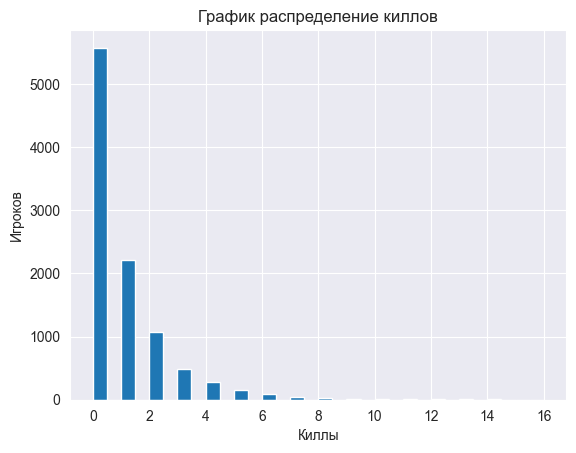

In [8]:
ax = df.kills.hist(bins=32)     # число подобрано опытным путем

ax.set_title('График распределение киллов')
ax.set_ylabel('Игроков')
ax.set_xlabel('Киллы')

Посмотрим roadKills

In [9]:
df.roadKills.value_counts()

roadKills
0     9888
1      105
2        3
3        1
15       1
11       1
Name: count, dtype: int64

#### Двух читаков уже нашли!  
- посмотрим на этих презренных типов
- и можно банить

In [10]:
first_chitaks = df[df.roadKills > 10]
first_chitaks.head()

,Id,matchDuration,heals,revives,swimDistance,walkDistance,rideDistance,teamKills,headshotKills,killStreaks,kills,longestKill,roadKills,weaponsAcquired
3939,30797ef1f3ef67,1975,0,0,0.000,2259.0,5766.0,0,0,15,15,0.00,15,8
8244,9c9619341dca0a,1828,8,0,8.182,1950.0,9139.0,0,0,11,12,41.11,11,8


#### Полезно посмотреть на корреляции параметров на тепловой карте ####

Для числовых колонок мы можем посмотреть коэффициенты корреляций.
- сделаем новый датафрейм, копия изначального, но без категориальной колонки 'ID'
- смотрим корреляции

In [11]:
df_corr = df.drop(columns='Id')
df_corr.corr()

,matchDuration,heals,revives,swimDistance,walkDistance,rideDistance,teamKills,headshotKills,killStreaks,kills,longestKill,roadKills,weaponsAcquired
matchDuration,1.000000,0.099837,-0.008821,0.028482,0.149092,0.368996,0.053019,-0.001038,-0.042576,-0.024250,0.062275,0.029225,0.152731
heals,0.099837,1.000000,0.224829,0.080463,0.420984,0.297798,0.032945,0.139947,0.232059,0.287097,0.247924,0.020219,0.308116
revives,-0.008821,0.224829,1.000000,0.021755,0.230252,0.094233,0.033287,0.114354,0.201496,0.236611,0.163242,-0.005541,0.172017
swimDistance,0.028482,0.080463,0.021755,1.000000,0.170859,0.038628,0.001096,0.015253,0.014924,0.026245,0.045256,0.016456,0.066561
walkDistance,0.149092,0.420984,0.230252,0.170859,1.000000,0.298467,0.026487,0.224729,0.277012,0.362561,0.389776,0.030913,0.562811
rideDistance,0.368996,0.297798,0.094233,0.038628,0.298467,1.000000,0.058572,0.065274,0.082983,0.104701,0.170414,0.064001,0.311233
teamKills,0.053019,0.032945,0.033287,0.001096,0.026487,0.058572,1.000000,0.016056,0.042472,0.033901,0.013211,-0.001592,0.026715
headshotKills,-0.001038,0.139947,0.114354,0.015253,0.224729,0.065274,0.016056,1.000000,0.530533,0.671803,0.455615,0.009210,0.156865
killStreaks,-0.042576,0.232059,0.201496,0.014924,0.277012,0.082983,0.042472,0.530533,1.000000,0.812936,0.458870,0.254900,0.227244
kills,-0.024250,0.287097,0.236611,0.026245,0.362561,0.104701,0.033901,0.671803,0.812936,1.000000,0.608824,0.155887,0.280861


Не очень наглядно, давайте визуализируем с Seaborn - построим тепловую карту

<Axes: >

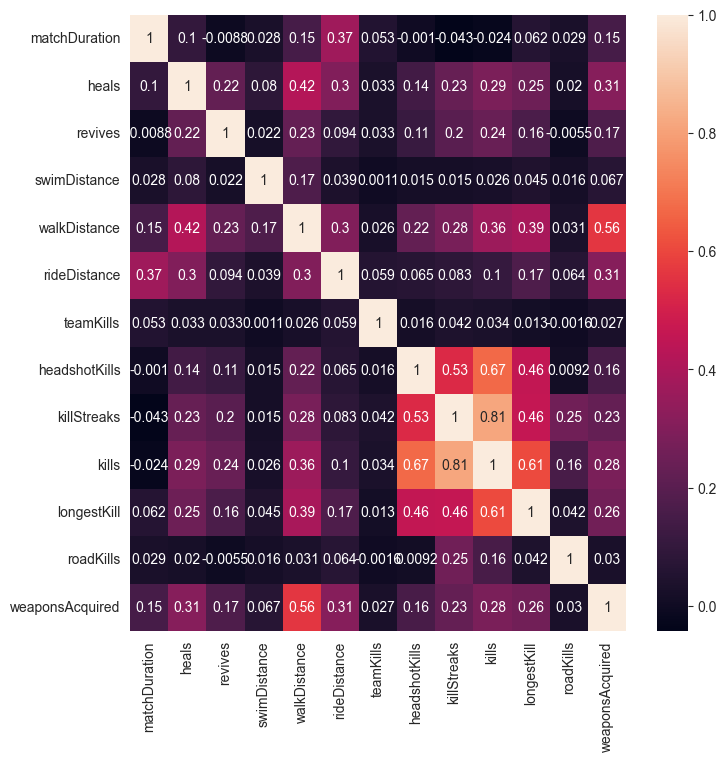

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))  # размеры графика
sns.heatmap(df_corr.corr(), annot=True)

#### Можем посмотреть взаимосвязи между параметрами ####

Например, интересно понять почему нет связи между продолжительностью игры и киллами.
Можем сделать это так:

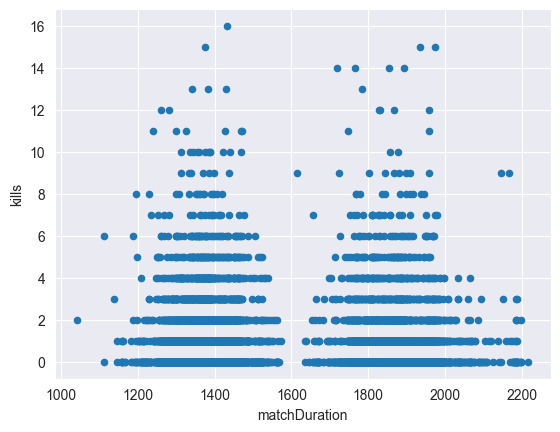

In [13]:
axes = df.plot.scatter("matchDuration", "kills")

Видим, что в середине игры есть "затишье". Но два типа с 15 и 16 килами в первой половине игры - уже подозрительны.

#### Поищем читеров по хедшотам. Распространенный чит ####
Отобразим киллы и хедшоты на одном графике
Похожий на график выше, но с дополнительной линией тренда и графиками по осям

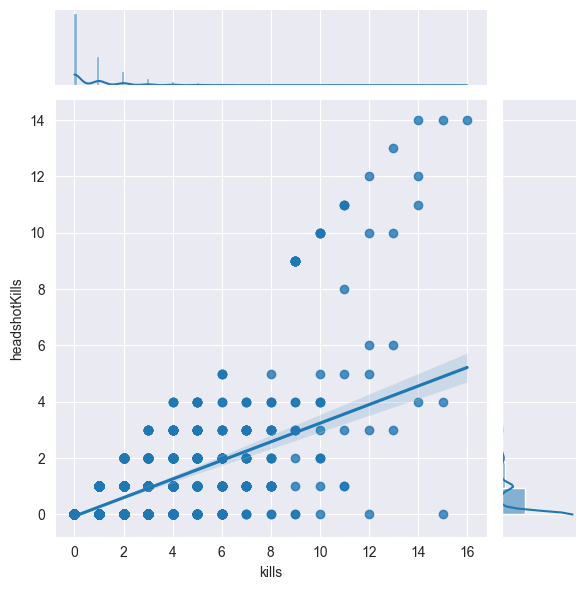

In [14]:
sns.jointplot(x='kills', y='headshotKills', data=df, kind='reg')

Видим что в среднем на 3 килла - 1 хедшот. Но не забываем, что есть и профессиональные игроки.
8 хедшотов из 11 киллов - где будем проводить границу?

Можно посмотреть сколько таких "метких" персонажей

In [15]:
df.headshotKills.value_counts()

headshotKills
0     8269
1     1346
2      261
3       64
4       24
9        9
5        7
10       6
11       4
14       3
12       2
6        2
13       1
8        1
Name: count, dtype: int64

In [ ]:
chita_ = df[ df['headshotKills'] >= 8 ]
chita_.head(100)

Можно сформулировать такие критерии читерства по хедшотам:
1. хедшоты == киллы >= 5
2. хедшоты >= 8 & хедшоты > (киллы * 60%) 

### График распределения "ящик с усами" ### 

Можно проанализировать каждый параметр на распределение, как в df.describe(), только на графике.
Посмотрим сколько оружия подбирают в среднем.

<Axes: ylabel='weaponsAcquired'>

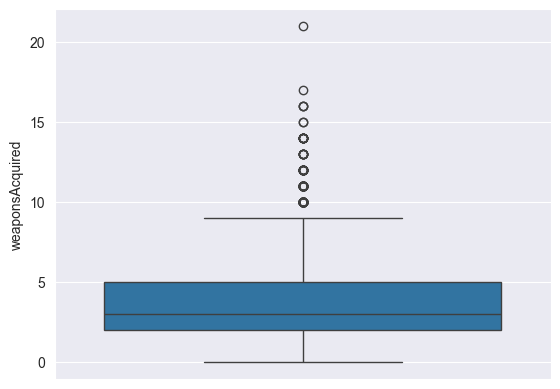

In [16]:
sns.boxplot(df.weaponsAcquired)

Есть ли снайпера в наших катках?

<Axes: ylabel='longestKill'>

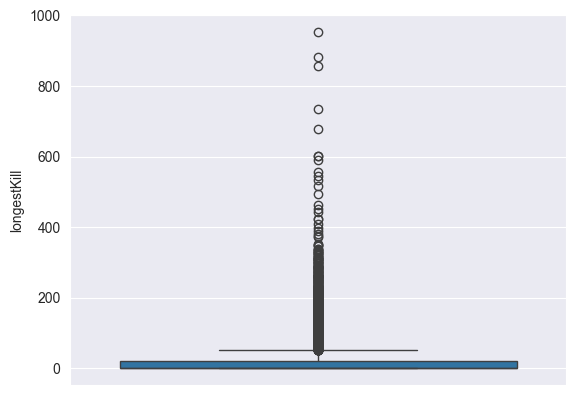

In [17]:
sns.boxplot(df.longestKill)

Видно, что график не очень подходит, но и видно, что основной бой происходит где-то до 50 метров.

И так далее, и так далее. Комбинируем переменные, делаем гипотезы.

Наши возможности накапливаются с опытом.

In [18]:
display(Image(url='https://kingame.ru/wp-content/uploads/5/2/1/521807c331ff39a91edebaad0a3ad7f8.jpeg', width = 800))